In [40]:
import pandas as pd

In [41]:
import numpy as np

In [42]:
import matplotlib.pyplot as plt

In [125]:
class Data:
    def __init__(self,path):
        self.file_path=path
        self.data=None
    def load(self):
        try:
            self.data=pd.read_csv(self.file_path)
            print("Data loaded successfully!")
        except Exception as e:
            print(f"Error loading data: {e}")
    def clean(self):
        if self.data is not None:
            self.data.drop_duplicates(inplace=True)
            self.data.columns = (self.data.columns.str.strip().str.lower().str.replace(' ','_'))
            if 'satisfaction_percentage' in self.data.columns:
                self.data['satisfaction_percentage']=self.data['satisfaction_percentage'].apply(lambda x: min(max(x,0),100))
            if 'age' in self.data.columns:
                self.data['age']=self.data['age'].apply(lambda x: min(max(x,1),100))
            print("Data cleaned successfully.")
        else:
            print("No data loaded to clean.")
    def missing_values(self,method='ffill'):
        if self.data is not None:
            if method=='ffill':
                self.data = self.data.ffill()
            elif method=='bfill':
                self.data = self.data.bfill()
            elif method=='mean':
                self.data.fillna(self.data.mean(),inplace=True)
            elif method == 'median':
                self.data.fillna(self.data.median(),inplace=True)
            else:
                print("Invalid method specified. No changes made.")
            print(f"Missing values handled using method: {method}")
        else:
            print("No data loaded to handle missing values.")
        self.data.info()
    def transform(self):
        if self.data is not None:
            if 'satisfaction_percentage' in self.data.columns:
                size=5
                self.data['rolling_avg_satisfaction'] = self.data['satisfaction_percentage'].rolling(window=size).mean()
                print(f"Rolling average of satisfaction percentages calculated (window size: {size}).")
            else:
                print("'satisfaction_percentage' column not found.")
        else:
            print("No data available for transformation.")
    def save(self,output_path):
        if self.data is not None:
            try:
                self.data.to_csv(output_path, index=False)
                print(f"Results saved to {output_path}")
            except Exception as e:
                print(f"Error saving results: {e}")
        else:
            print("No data available to save.")
    def summarize(self):
        if self.data is not None:
            positive = self.data[self.data['satisfaction_percentage']>70]
            negative = self.data[self.data['satisfaction_percentage']<30]
            print('\nSummary of Findings:')
            print(f"Positive Reviews Analysis: Average Satisfaction = {positive['satisfaction_percentage'].mean():.2f}%")
            print(f"Negative Reviews Analysis: Average Satisfaction = {negative['satisfaction_percentage'].mean():.2f}%")
        else:
            print("No data available for summarizing findings.")
    def plot(self):
        if self.data is not None:
            condition=[(self.data['satisfaction_percentage'] > 70),(self.data['satisfaction_percentage'] <= 70) & (self.data['satisfaction_percentage'] >= 30),(self.data['satisfaction_percentage'] < 30)]
            choice = ['Positive','Neutral','Negative']
            self.data['sentiment_category'] = np.select(condition,choice,default='Neutral')
            counts = self.data['sentiment_category'].value_counts()
            plt.figure(figsize=(8, 8))
            counts.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=['#66b3ff','#99ff99','#ff6666'])
            plt.title('Sentiment Distribution (Positive, Neutral, Negative)')
            plt.show()
        else:
            print("No data available for sentiment distribution plotting.")
    def analyze(self):
        if self.data is not None:
            plt.figure(figsize=(10, 6))
            self.data.groupby('age')['satisfaction_percentage'].mean().plot(kind='line',marker='o')
            plt.title('Sentiment Trend Over Age')
            plt.xlabel('Age')
            plt.ylabel('Average Satisfaction Percentage')
            plt.grid(True)
            plt.show()
        else:
            print("No data available for sentiment trend analysis.")
    def analyzes(self, keyword):
        if self.data is not None and 'product_reviews' in self.data.columns:
            count = self.data['product_reviews'].str.contains(keyword,case=False,na=False).sum()
            print(f"The keyword '{keyword}' appears {count} times in the product reviews.")
        else:
            print("No data available for keyword analysis.")
    def plot_brands(self):
        if self.data is not None:
            plt.figure(figsize=(10, 6))
            self.data.groupby('brand')['satisfaction_percentage'].mean().plot(kind='bar',color='skyblue')
            plt.title('Average Satisfaction Percentage by Brand')
            plt.xlabel('Brand')
            plt.ylabel('Average Satisfaction Percentage')
            plt.grid(True)
            plt.show()
        else:
            print("No data available for plotting.")

In [126]:
path = "D:\\Study\\Semster 3\\PAI_LAB\\Final_Project\\Product_reviews.csv"

In [127]:
output_path = "D:\\Study\\Semster 3\\PAI_LAB\\Final_Project\\Product_reviews_cleaned_results.csv"

In [128]:
data=Data(path)

In [129]:
data.load()

Data loaded successfully!


In [130]:
data.clean()

Data cleaned successfully.


In [131]:
data.missing_values('ffill')

Missing values handled using method: ffill
<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 154
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     154 non-null    object 
 1   age                      154 non-null    float64
 2   gender                   154 non-null    object 
 3   satisfaction_percentage  154 non-null    float64
 4   brand                    154 non-null    object 
 5   city                     154 non-null    object 
 6   product_reviews          154 non-null    object 
dtypes: float64(2), object(5)
memory usage: 9.6+ KB


In [132]:
data.transform()

Rolling average of satisfaction percentages calculated (window size: 5).


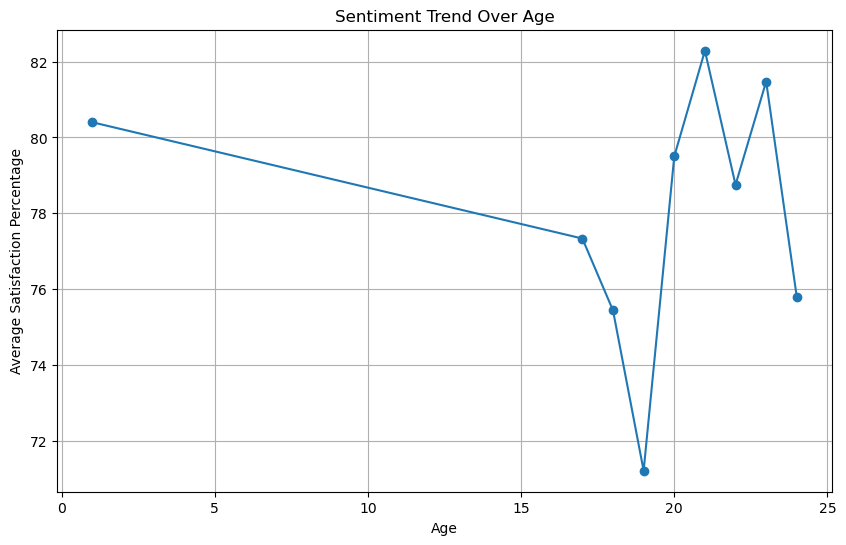

In [133]:
data.analyze()

In [134]:
data.analyzes('great')

The keyword 'great' appears 0 times in the product reviews.


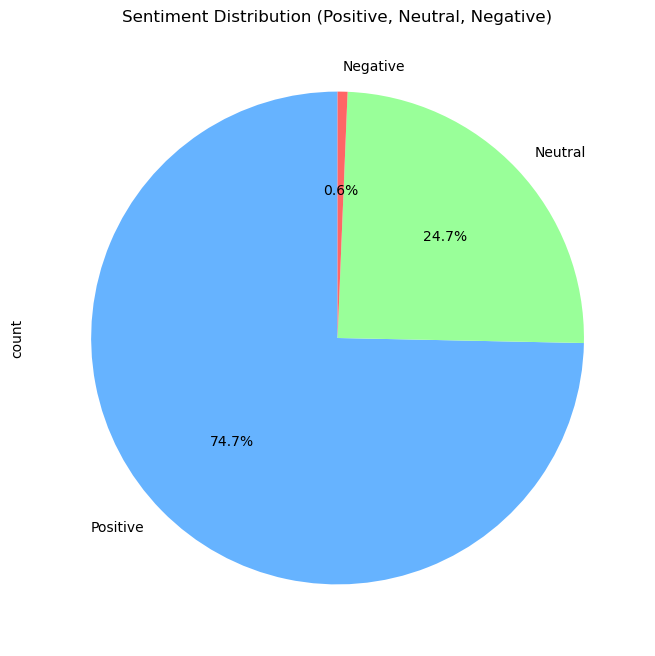

In [135]:
data.plot()

In [136]:
data.save(output_path)

Results saved to D:\Study\Semster 3\PAI_LAB\Final_Project\Product_reviews_cleaned_results.csv


In [137]:
data.summarize()


Summary of Findings:
Positive Reviews Analysis: Average Satisfaction = 84.54%
Negative Reviews Analysis: Average Satisfaction = 0.00%


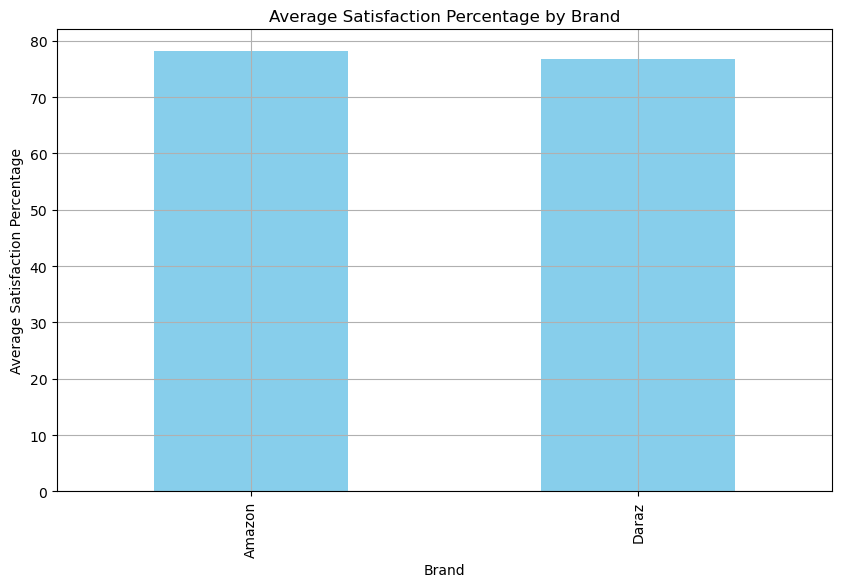

In [138]:
data.plot_brands()